In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [5]:
name_list = open('names.txt').read().splitlines()

In [7]:
chars = sorted(list(set(''.join(name_list))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [9]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [10]:
for w in name_list:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
    

In [11]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

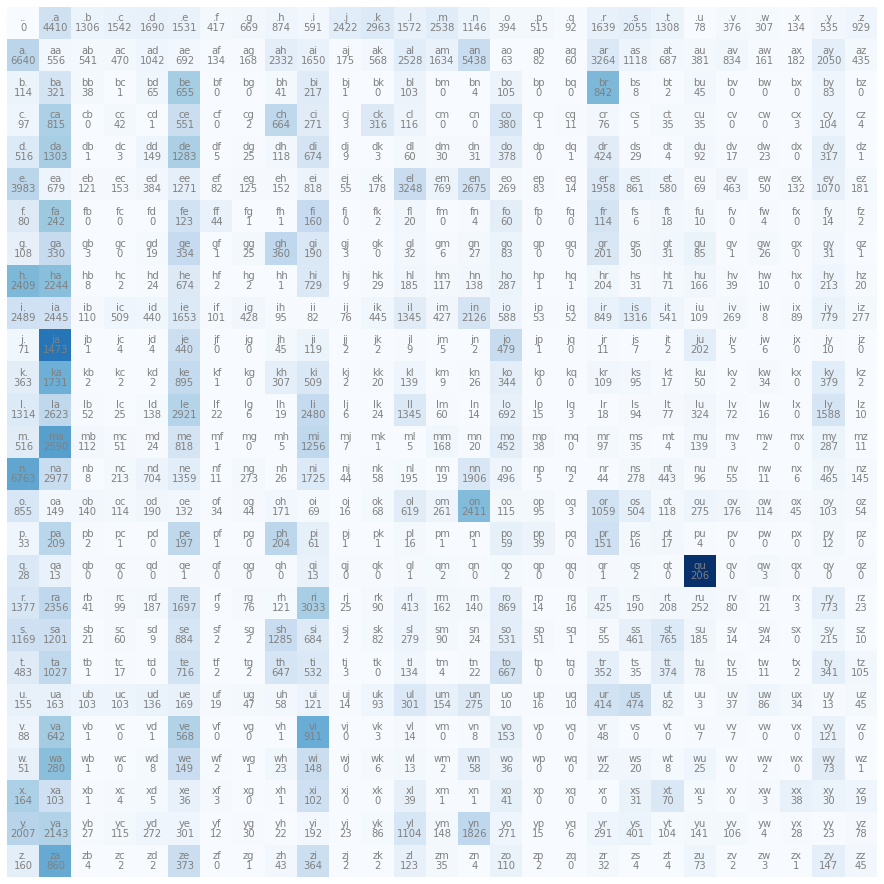

In [12]:
plt.figure(figsize=(16,16))
plt.imshow(P, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [17]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  
    out = []
    ix = 0
    while True:
        p = P[ix]
        
        #uncomment to use uniformly distributed probabilities
#         p = torch.ones(27) / 27.0
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [ ]:

# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# However, likelihood of probabilities -> product of probabilities -> ranges between 0 and 1 

# ->use log likelihood that map the probabilites to range from 0 to -inf
# equivalent to maximizing the log likelihood (because log is monotonic)

# since it ranges from 0 to -inf, we don't really want to "minimize" the log likelihood
# -> invert the log likelihood so that we are able to "minimize" the negative log likelihood
# equivalent to minimizing the negative log likelihood

# people tend to use the average negative log likelihood for easier interpretation
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [19]:
log_likelihood = 0.0
n = 0

for w in name_list:
#for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [21]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in name_list[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [22]:
import torch.nn.functional as F

In [23]:
# we have integer indexes, but we can't just put integer index into neural network
# encoding integer -> one hot encoding
xenc = F.one_hot(xs, num_classes=27).float() # cast into float because we don't want to feed integer into neural network, we want the number to be floating
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [53]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad = True) # requires_grad is needed to be able to do backprop
(xenc @ W)

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [56]:
logits = (xenc @ W) # this is the log of counts 
# counts and probs are called softmax -> it takes a vector of numbers and convert it into a vector of probabilities
counts = logits.exp() # apply log of x to map them from > 0 to +inf -> predicting counts -> equivalent to N
probs = counts / counts.sum(1, keepdims = True) # equivalent to P
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [ ]:
# GOAL : create a probability distribution for the next character

In [57]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
label (actual next character):

In [58]:
loss = -probs[torch.arange(len(ys)), ys].log().mean() # subset tensor by paired row-column index
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [61]:
torch.tensor([1,2])

tensor([1, 2])

In [64]:
W.grad = None # grad None in pytorch is equivalent to grad zero
# W.grad = torch.tensor(0)
loss.backward() # the backward framework is similar to what we built in micrograd

In [70]:
W.grad.shape

torch.Size([27, 27])

In [71]:
W.data += -0.1 * W.grad

Create dataset and initializing the network

In [73]:
# create the dataset
xs, ys = [], []
for w in name_list:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


Feed Forward and Back Prop <br>
We aim to create a higher performing model than the counting model

In [ ]:
'''
the less w is close to 0, the more smooth or more uniform the probability distribution will look like
the 0.01*(W**2).mean() equation in the loss function is an equivalent of smoothing in gradient descent 
it is also called regularization
achieve 0 loss when W is close to 0

0.01 here is equivalent to 1 in the (N + 1) -> let's called it lambda
if lambda is small, the weight will grow
if lambda is big, the weight be restricted by too much loss -> every layer will be roughly linear -> leading to less variance -> may result in something more uniform (introducing bias)
'''

In [84]:
for k in range(200):
  
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    
    loss = -probs[torch.arange(num), ys].log().mean() + 0.001*(W**2).mean() 
    print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad

2.4646310806274414
2.464587926864624
2.4645447731018066
2.4645023345947266
2.464460849761963
2.464419364929199
2.4643783569335938
2.4643375873565674
2.4642975330352783
2.4642579555511475
2.4642186164855957
2.464179754257202
2.464141607284546
2.4641029834747314
2.4640655517578125
2.4640285968780518
2.463991403579712
2.4639554023742676
2.463918924331665
2.463883638381958
2.4638478755950928
2.463813304901123
2.463778257369995
2.4637441635131836
2.463710069656372
2.4636764526367188
2.4636435508728027
2.4636106491088867
2.4635777473449707
2.463545322418213
2.4635138511657715
2.4634816646575928
2.4634506702423096
2.4634194374084473
2.463388442993164
2.463357925415039
2.4633278846740723
2.4632980823516846
2.463268518447876
2.4632391929626465
2.463209867477417
2.463181495666504
2.4631528854370117
2.4631242752075195
2.4630961418151855
2.463068723678589
2.463041067123413
2.4630138874053955
2.462986707687378
2.4629602432250977
2.4629335403442383
2.462907075881958
2.462881088256836
2.4628555774688

In [83]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
    out = []
    ix = 0
    while True:
    
        # ----------
        # BEFORE:
        #p = P[ix]
        # ----------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float() # create an one hot encoding for character-i
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # a vector of probabilities for next character
        # ----------

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # random sampling from a multinomial distribution; return the index
        out.append(itos[ix]) # look up which character is index-ix
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
prelay.
a.
nn.


In [81]:
F.one_hot(torch.tensor([1]), num_classes=27).float() @ W

tensor([[ 2.2417, -0.2384, -0.2658, -0.4064,  0.3894, -0.0198, -1.6557, -1.4323,
          1.1951,  0.8491, -1.3916, -0.2172,  1.2758,  0.8394,  2.0419, -2.3585,
         -2.1251, -2.4121,  1.5314,  0.4598, -0.0270, -0.6160,  0.1668, -1.4744,
         -1.3526,  1.0662, -0.4836]], grad_fn=<MmBackward0>)